# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ester Tri Wahyuningsih
- **Email:** estertriw16@gmail.com
- **ID Dicoding:** MC002D5X0841

## Menentukan Pertanyaan Bisnis

- Bagaimana perubahan jumlah penyewaan sepeda dari tahun 2011 hingga 2012?
- Bagaimana pola penyewaan sepeda per bulan, dan apakah ada pola musiman yang memengaruhi jumlah penyewaan?
- Kapan jumlah penyewaan sepeda paling tinggi dalam sehari, baik berdasarkan jam maupun hari dalam seminggu?
- Bagaimana hubungan antara faktor lingkungan (kondisi cuaca (weathersit), suhu (temp), kelembapan (hum), dan kecepatan angin (windspeed)) terhadap jumlah penyewaan sepeda?
- Bagaimana perbandingan jumlah penyewaan sepeda pada hari kerja dan hari libur?
- Bagaimana perbedaan pola penyewaan antara pengguna kasual (casual) dan pengguna terdaftar (registered) pada hari kerja dibandingkan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [217]:
pip install streamlit

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [219]:
# Load Data
@st.cache_data
def load_data():
    day_df = pd.read_csv("https://raw.githubusercontent.com/EsterTriW/Proyek-Analisis-Data/main/day.csv")
    hour_df = pd.read_csv("https://raw.githubusercontent.com/EsterTriW/Proyek-Analisis-Data/main/hour.csv")
    return day_df, hour_df

day_df, hour_df = load_data()

2025-03-05 16:30:59.158 No runtime found, using MemoryCacheStorageManager


In [220]:
# Dataset yang digunakan (day_df)
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [221]:
# Dataset yang digunakan (hour_df)
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight:**
- Data day memiliki 731 datum dan hour memiliki 17379 datum
- Kedua tabel memiliki 17 variabel, dengan keterangan :
1. instant: Indeks rekaman (ID)
2. dteday: Tanggal, bulan, tahun
3. season: Musim (1: Musim Semi, 2: Musim Panas, 3: Musim Gugur, 4: Musim Dingin)
4. yr: Tahun (0: 2011, 1: 2012)
5. mnth: Bulan (1 hingga 12)
6. hr: Jam (0 hingga 23)
7. holiday: Hari libur atau tidak
8. weekday: Hari dalam seminggu
9. workingday: Hari kerja (Jika hari tersebut bukan akhir pekan atau hari libur maka nilainya 1, jika tidak maka 0)
10. weathersit (Kondisi Cuaca):
1: Cerah
2: Berawan
3: Salju ringan, Hujan ringan
4: Hujan deras + Butiran es
11. temp: Suhu normalisasi dalam Celsius (nilai dibagi dengan 41, yaitu suhu maksimum)
12. atemp: Suhu yang dirasakan (nilai dibagi dengan 50, yaitu suhu maksimum yang dirasakan)
13. hum: Kelembapan normalisasi (nilai dibagi dengan 100, yaitu kelembapan maksimum)
14. windspeed: Kecepatan angin normalisasi (nilai dibagi dengan 67, yaitu kecepatan maksimum)
15. casual: Jumlah pengguna kasual (pengguna tidak terdaftar)
16. registered: Jumlah pengguna terdaftar
17. cnt: Jumlah total penyewaan sepeda (gabungan dari pengguna kasual dan terdaftar)

### Assessing Data

In [222]:
# Cek day_df
day_df.info()

# Cek hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [223]:
# Cek Missing Values day_df
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [224]:
# Cek Missing Values hour_df
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [225]:
# Cek duplikasi
print("Jumlah duplikasi day_df: ", day_df.duplicated().sum())
print("Jumlah duplikasi hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi day_df:  0
Jumlah duplikasi hour_df:  0


In [226]:
# Cek Perbedaan casual, registered, dan cnt day_df
day_df["cnt_diff"] = day_df["cnt"] - (day_df["casual"] + day_df["registered"])
day_df["cnt_diff"].describe()

,cnt_diff
count,731.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [227]:
# Perbedaan casual, registered, dan cnt hour_df
hour_df["cnt_diff"] = hour_df["cnt"] - (hour_df["casual"] + hour_df["registered"])
hour_df["cnt_diff"].describe()

,cnt_diff
count,17379.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [228]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cnt_diff
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.0
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,0.0
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,0.0
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,0.0
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,0.0
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,0.0
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,0.0
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,0.0


In [229]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cnt_diff
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.0
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,0.0
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,0.0
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,0.0
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,0.0
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,0.0
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,0.0


**Insight:**
- tidak ada *Missing Value*
- tidak ada nilai duplikat
- tidak ada *inaccurate value*

Cleaning Data :
- tipe data dteday masih berbentuk object (harus diubah ke datetime)
- Nilai season, weekday, dan weathersit dalam bentuk numerical, bisa diubah ke kategori agar lebih mudah dibaca.

### Cleaning Data

In [230]:
# Ubah kolom 'dteday' menjadi format datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [231]:
# Mapping kategori agar lebih mudah dibaca
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weekday_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
weathersit_map = {
    1: 'Cerah',
    2: 'Berawan/mendung',
    3: 'Hujan ringan',
    4: 'Hujan deras'
}

day_df['season'] = day_df['season'].map(season_map)
day_df['weekday'] = day_df['weekday'].map(weekday_map)
day_df['weathersit'] = day_df['weathersit'].map(weathersit_map)

hour_df['season'] = hour_df['season'].map(season_map)
hour_df['weekday'] = hour_df['weekday'].map(weekday_map)
hour_df['weathersit'] = hour_df['weathersit'].map(weathersit_map)

In [232]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
 16  cnt_diff    731 non-null  

**Insight: data sudah clean**
- tidak ada *Missing Value*
- tidak ada nilai duplikat
- tidak ada *inaccurate value*
- tipe data dteday sudah berbentuk datetime
- Nilai season, weekday, dan weathersit sudah dalam bentuk categorical (object) agar lebih mudah dibaca.

## Exploratory Data Analysis (EDA)

### Explore dataset day_df dan hour_df

In [233]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cnt_diff
count,731.000000,731,731,731.000000,731.000000,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.0
unique,NaN,NaN,4,NaN,NaN,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,Saturday,NaN,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,NaN,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,6.519836,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,0.0
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,0.0
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,4.000000,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,0.0
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,7.000000,0.000000,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,0.0
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,10.000000,0.000000,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,0.0
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,12.000000,1.000000,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,0.0


In [234]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cnt_diff
count,17379.0000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.0
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,NaN,Saturday,NaN,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,NaN,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,0.502561,6.537775,11.546752,0.028770,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,0.0
min,1.0000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
25%,4345.5000,2011-07-04 00:00:00,NaN,0.000000,4.000000,6.000000,0.000000,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,0.0
50%,8690.0000,2012-01-02 00:00:00,NaN,1.000000,7.000000,12.000000,0.000000,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,0.0
75%,13034.5000,2012-07-02 00:00:00,NaN,1.000000,10.000000,18.000000,0.000000,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,0.0
max,17379.0000,2012-12-31 00:00:00,NaN,1.000000,12.000000,23.000000,1.000000,NaN,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,0.0


In [235]:
def remove_outliers(df):
    df_numeric = df.select_dtypes(include=['number'])

    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mask = (df_numeric >= lower_bound) & (df_numeric <= upper_bound)
    df_filtered = df_numeric[mask.all(axis=1)]

    return df[df.index.isin(df_filtered.index)]
day_cleaned = remove_outliers(day_df)
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [236]:
# PERTANYAAN 1
# Eksplorasi penyewaan sepeda berdasarkan tahun (0=2011, 1=2012)
day_df.groupby(by="yr").cnt.mean()

,cnt
yr,
0,3405.761644
1,5599.934426


**Insight:**
- Ada tren peningkatan penyewaan sepeda dari tahun 2011 ke 2012


In [237]:
# Eksplorasi penyewaan sepeda berdasarkan bulan dan tahun (0=2011, 1=2012)
day_df.groupby(by=["yr", "mnth"]).agg({
    "cnt": "sum"
}).unstack(0)

cnt        
yr         0       1
mnth                
1      38189   96744
2      48215  103137
3      64045  164875
4      94870  174224
5     135821  195865
6     143512  202830
7     141341  203607
8     136691  214503
9     127418  218573
10    123511  198841
11    102167  152664
12     87323  123713

**Insight:**
- Ada tren peningkatan dari bulan 1-12 tahun 2011 ke 2012, menunjukkan bahwa program penyewaan sepeda semakin populer. Adanya penurunan di bulan tertentu diasumsikan karena ada faktor eksternal lain yang memengaruhi seperti cuaca dan musim


In [238]:
# PERTANYAAN 2
# Eksplorasi penyewaan sepeda berdasarkan bulan
day_df.groupby(by="mnth").cnt.sum().sort_values(ascending=False)

,cnt
mnth,
8,351194
6,346342
9,345991
7,344948
5,331686
10,322352
4,269094
11,254831
3,228920


**Insight:**
- Jumlah penyewaan sepeda **paling tinggi pada bulan Agustus** dan **paling rendah pada bulan Januari**

In [239]:
# Eksplorasi penyewaan berdasarkan musim
day_df.groupby(by="season").agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
}).sort_values(by="cnt", ascending=False)

,cnt,casual,registered
season,,,
Fall,1061129,226091,835038
Summer,918589,203522,715067
Winter,841613,129782,711831
Spring,471348,60622,410726


**Insight:**
- Jumlah penyewaan sepeda **paling tinggi pada musim Fall** dan **paling rendah pada musim Spring**

In [240]:
# PERTANYAAN 3
# Eksplorasi penyewaan sepeda berdasarkan Hari dalam seminggu
day_df.groupby(by="weekday").cnt.sum()

,cnt
weekday,
Friday,487790
Monday,455503
Saturday,477807
Sunday,444027
Thursday,485395
Tuesday,469109
Wednesday,473048


**Insight:**
- Penyewaan sepeda paling tinggi pada hari Jumat

In [241]:
# Eksplorasi penyewaan sepeda tertinggi berdasarkan jam
hour_df.groupby(by="hr").cnt.sum().sort_values(ascending=False).head(5)

,cnt
hr,
17,336860
18,309772
8,261001
16,227748
19,226789


In [242]:
# Eksplorasi penyewaan sepeda terendah berdasarkan jam
hour_df.groupby(by="hr").cnt.sum().sort_values(ascending=True).head(5)

,cnt
hr,
4,4428
3,8174
5,14261
2,16352
1,24164


**Insight:**
- Jam puncak penyewaan ada di pukul 17 dan 18 (pelanggan lebih senang melakukan penyewaan di sore hari)
- Jam sepi penyewaan ada di pukul 3 - 5 (pelanggan jarang melakukan penyewaan di subuh hari)

In [243]:
# PERTANYAAN 4
# Eksplorasi penyewaan sepeda berdasarkan cuaca
day_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False)

,cnt
weathersit,
Cerah,2257952
Berawan/mendung,996858
Hujan ringan,37869


**Insight:**
- Penyewaan sepeda paling tinggi pada cuaca Cerah

In [244]:
# Korelasi antara suhu, kelembaban, kecepatan angin dan jumlah penyewaan sepeda
temp_corr = day_df[["temp", "cnt"]].corr().iloc[0, 1]
hum_corr = day_df[["hum", "cnt"]].corr().iloc[0, 1]
wind_corr = day_df[["windspeed", "cnt"]].corr().iloc[0, 1]

print(f"korelasi suhu dan jumlah penyewaan sepeda =", {temp_corr})
print(f"korelasi kelembaban dan jumlah penyewaan sepeda =", {hum_corr})
print(f"korelasi kecepatan angin dan jumlah penyewaan sepeda =", {wind_corr})

korelasi suhu dan jumlah penyewaan sepeda = {0.6274940090334914}
korelasi kelembaban dan jumlah penyewaan sepeda = {-0.1006585621371548}
korelasi kecepatan angin dan jumlah penyewaan sepeda = {-0.23454499742167056}


**Insight:**
- Suhu cukup berpengaruh positif dengan jumlah penyewaan sepeda. Semakin tinggi suhu, semakin banyak sepeda yang disewa.
- kelembaban tidak terlalu berpengaruh dengan jumlah penyewaan sepeda.
- kecepatan angin sedikit berpengaruh negatif terhadap jumlah penyewaan sepeda.

In [245]:
# PERTANYAAN 5
# Eksplorasi penyewaan sepeda berdasarkan status workingday dan holiday
day_df["status"] = day_df["workingday"].apply(lambda x: "working day" if x == 1 else "holiday")
day_df["status"].value_counts()
day_df.groupby(by="status").cnt.mean()

,cnt
status,
holiday,4330.168831
working day,4584.820000


**Insight:**
- Penyewaan sepeda pada working day lebih tinggi dibanding pada holiday

In [246]:
# Eksplorasi penyewaan sepeda pada workingday berdasarkan tahun (0=2011. 1 = 2012), (0=holiday, 1=workingday)
workingday_year = day_df.groupby(by=["workingday", "yr"]).agg({
    "cnt": "sum"
}).unstack(0)
print(workingday_year)

               cnt         
workingday       0        1
yr                         
0           386839   856264
1           613430  1436146


**Insight:**
- Penyewaan sepeda pada **workingday** dan **holiday** mengalami **peningkatan dari tahun 2011 ke 2012. Namun, pelanggan lebih senang menyewa sepeda pada workingday

In [247]:
# Eksplorasi pola penyewaan sepeda di hari kerja berdasarkan faktor cuaca
day_df.groupby(by=["workingday", "weathersit"]).agg({
    "cnt": "mean"
}).unstack(0)

cnt             
workingday                 0            1
weathersit                               
Berawan/mendung  3936.828571  4075.028249
Cerah            4587.269231  5023.902280
Hujan ringan     1815.400000  1799.500000

**Insight:**
- Penyewaan sepeda di hari kerja meningkat dari tahun 2011 ke 2012 pada saat cuaca Cerah dan berawan
- Penyewaan sepeda di hari kerja mengalami penurunan pada saat cuaca hujan ringan

In [248]:
# PERTANYAAN 6
# Eksplorasi penyewaan sepeda pelanggan casual dan registered berdasarkan tahun
day_df.groupby(by="yr").agg({
    "casual": "mean",
    "registered": "mean"
})

,casual,registered
yr,,
0,677.402740,2728.358904
1,1018.483607,4581.450820


**Insight:**
- Pelanggan registered lebih banyak dibanding pelanggan casual

In [249]:
# Eksplorasi penyewaan sepeda pelanggan casual dan registered berdasarkan workingday dan holiday
day_df.groupby(by=["workingday"]).agg({
    "casual": "mean",
    "registered":"mean"
})

,casual,registered
workingday,,
0,1371.134199,2959.034632
1,606.570000,3978.250000


**Insight:**
- Pelanggan casual mengalami penurunan pada hari kerja, sedangkan pelanggan registered mengalami peningkatan pada hari kerja (pelanggan casual lebih senang pada holiday, pelanggan registered lebih senang pada workingday)

In [250]:
# Eksplorasi penyewaan sepeda pelanggan casual dan registered berdasarkan jam
hour_df.groupby(by="hr").agg({
    "casual": "mean",
    "registered": "mean"
})

,casual,registered
hr,,
0,10.158402,43.739669
1,6.504144,26.871547
2,4.772028,18.097902
3,2.715925,9.011478
4,1.253945,5.098996
5,1.411437,18.478382
6,4.161379,71.882759
7,11.055021,201.009629
8,21.679505,337.331499


**Insight:**
- Jam padat penyewaan sepeda pelanggan registered ada pada sekitar pukul 8 dan 17-18
- Jam padat penyewaan sepeda pelanggan casual ada pada sekitar pukul 13-17
- Jam sepi penyewaan sepeda pelanggan registered ada pada sekitar pukul 3-4 subuh
- Jam sepi penyewaan sepeda pelanggan casual ada pada sekitar pukul 3-5 subuh

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perubahan jumlah penyewaan sepeda dari tahun 2011 hingga 2012?

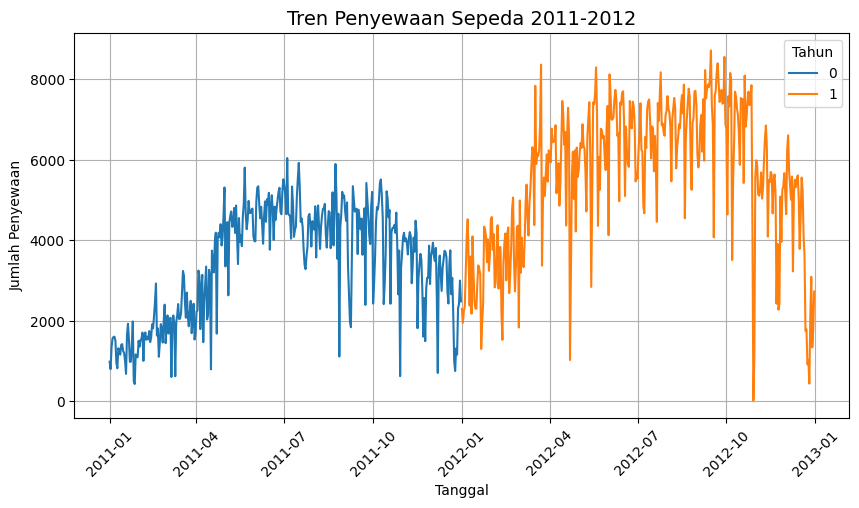

In [251]:
# Visualisasi tren penyewaan sepeda dari tahun 2011 ke 2012
plt.figure(figsize=(10, 5))
sns.lineplot(data=day_df, x="dteday", y="cnt", hue="yr", palette="tab10")
plt.title("Tren Penyewaan Sepeda 2011-2012", fontsize=14)
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(rotation=45)
plt.legend(title="Tahun")
plt.grid(True)
plt.show()

**Insight:**
- Visualisasi di atas menunjukkan tren peningkatan dari tahun 2011 ke 2012
- Terdapat pola penyewaan sepeda setiap bulannya yang akan dianalisis lebih lanjut di pertanyaan selanjutnya.

### Pertanyaan 2: Bagaimana pola penyewaan sepeda per bulan, dan apakah ada pola musiman yang memengaruhi jumlah penyewaan?

<ipython-input-252-2d319cc16c9a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(month, x="mnth", y="cnt", palette="coolwarm")


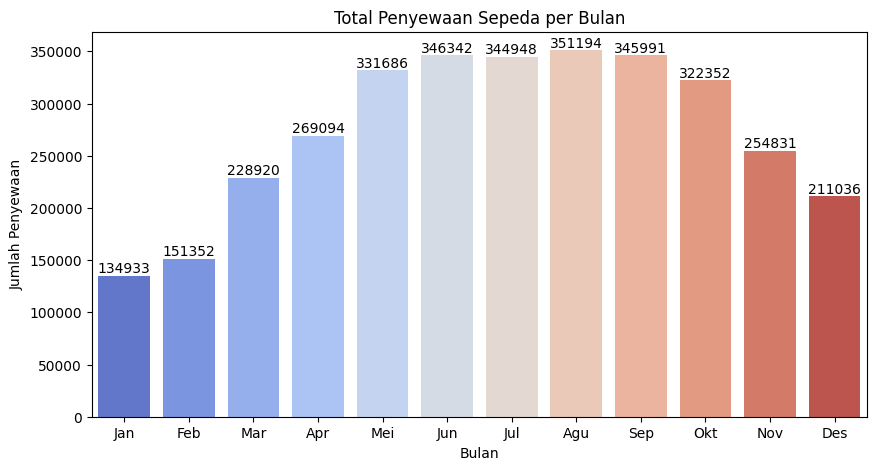

In [252]:
# Visualisasi Total Penyewaan Sepeda per Bulan
month = day_df.groupby(by= "mnth").cnt.sum().reset_index()
plt.figure(figsize=(10, 5))
ax = sns.barplot(month, x="mnth", y="cnt", palette="coolwarm")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.title("Total Penyewaan Sepeda per Bulan"
)
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan")
plt.show()

**Insight:**
- Visualisasi di atas menunjukkan penyewaan sepeda setiap bulan variatif
- Penyewaan sepeda tertinggi pada bulan Agustus dan terendah pada bulan Januari. Hal ini bisa diasumsikan pola musim pada bulan tersebut

<ipython-input-253-723f8f2767ff>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=musim, x="season", y="cnt", palette="coolwarm")


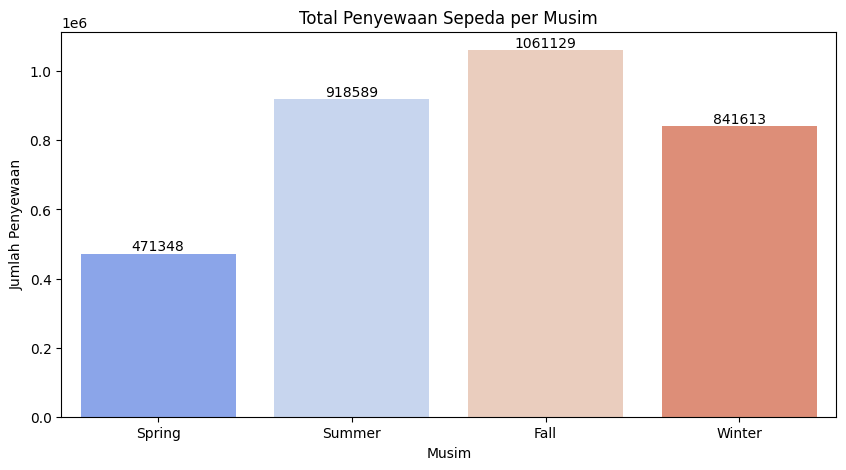

In [253]:
# Total Penyewaan Sepeda per Musim

musim = day_df.groupby(by="season")["cnt"].sum().reset_index()
musim["season"] = musim["season"].map({"Spring": 1, "Summer": 2, "Fall": 3, "Winter": 4})

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=musim, x="season", y="cnt", palette="coolwarm")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(ticks=[0, 1, 2, 3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.title("Total Penyewaan Sepeda per Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan")
plt.show()


**Insight:**
- Visualisasi di atas menunjukkan penyewaan sepeda setiap musim variatif. Musim berkaitan dengan bulan tertentu dalam 1 tahun.
- Penyewaan sepeda tertinggi pada musim Fall (sekitar bulan Agustus) dan terendah pada musim Spring (sekitar bulan Januari)

### Pertanyaan 3: Kapan jumlah penyewaan sepeda paling tinggi, baik berdasarkan hari dalam seminggu dan jam dalam sehari?

<ipython-input-254-fc51917b2454>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=weekday_avg["weekday"], y=weekday_avg["cnt"], palette="coolwarm")


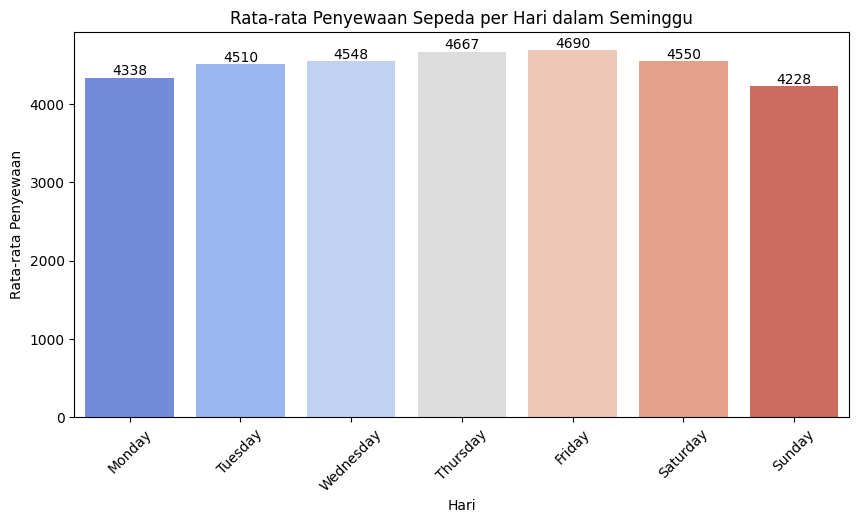

In [254]:
# Visualisasi Rata-rata Penyewaan per Hari dalam Seminggu
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_avg = day_df.groupby(by="weekday").cnt.mean().reset_index()
weekday_avg["weekday"] = pd.Categorical(weekday_avg["weekday"], categories=weekday_order, ordered=True)
weekday_avg = weekday_avg.sort_values("weekday")

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=weekday_avg["weekday"], y=weekday_avg["cnt"], palette="coolwarm")

for p, value in zip(ax.patches, weekday_avg["cnt"]):
    ax.annotate(f'{int(value)}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title("Rata-rata Penyewaan Sepeda per Hari dalam Seminggu")
plt.xlabel("Hari")
plt.ylabel("Rata-rata Penyewaan")
plt.xticks(rotation=45)
plt.show()


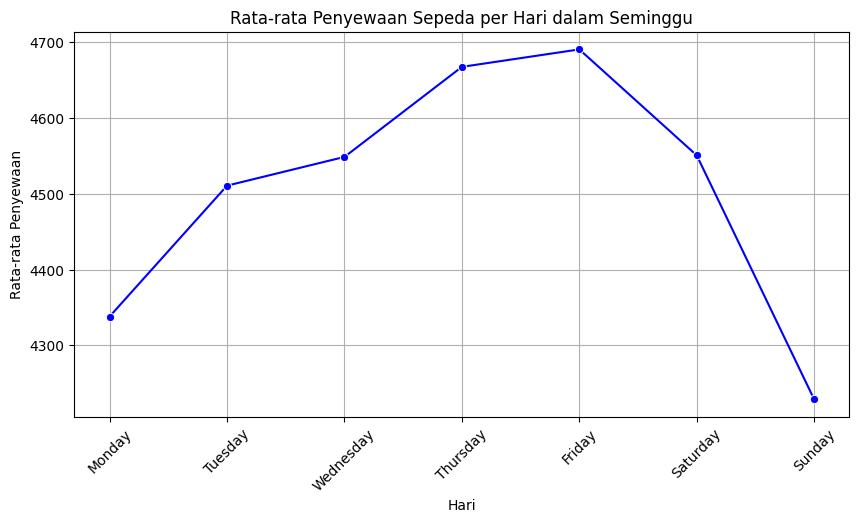

In [255]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=weekday_avg["weekday"], y=weekday_avg["cnt"], marker='o', linestyle='-', color='b')

plt.title("Rata-rata Penyewaan Sepeda per Hari dalam Seminggu")
plt.xlabel("Hari")
plt.ylabel("Rata-rata Penyewaan")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Insight:**
- Visualisasi di atas menunjukkan penyewaan sepeda per hari dalam 1 minggu
- Penyewaan sepeda tertinggi pada hari Jumat dan terendah pada hari Minggu

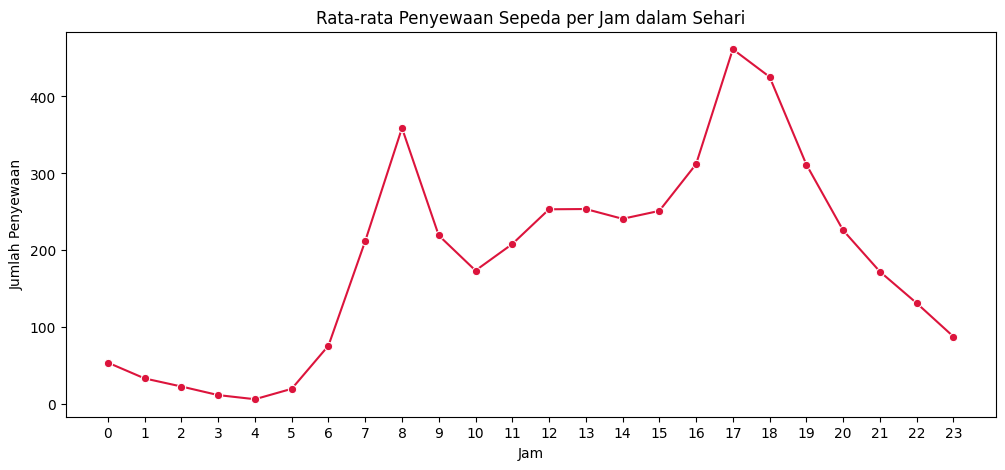

In [256]:
# Visualisasi Rata-rata Penyewaan Sepeda Berdasarkan Jam
jam = hour_df.groupby(by= "hr").cnt.mean()
plt.figure(figsize=(12, 5))

ax = sns.lineplot(jam, marker="o", color="crimson")
plt.xticks(range(24))
plt.title("Rata-rata Penyewaan Sepeda per Jam dalam Sehari")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.show()

**Insight:**
- Visualisasi di atas menunjukkan penyewaan sepeda per jam dalam 1 hari
- Penyewaan sepeda tertinggi pada pukul 17-18 (sore) dan pukul 8 (pagi)
- Penyewaan sepeda terendah pada pukul 3-5 (subuh)

### Pertanyaan 4: Bagaimana hubungan antara faktor lingkungan (kondisi cuaca (weathersit), suhu (temp), kelembapan (hum), dan kecepatan angin (windspeed)) terhadap jumlah penyewaan sepeda?

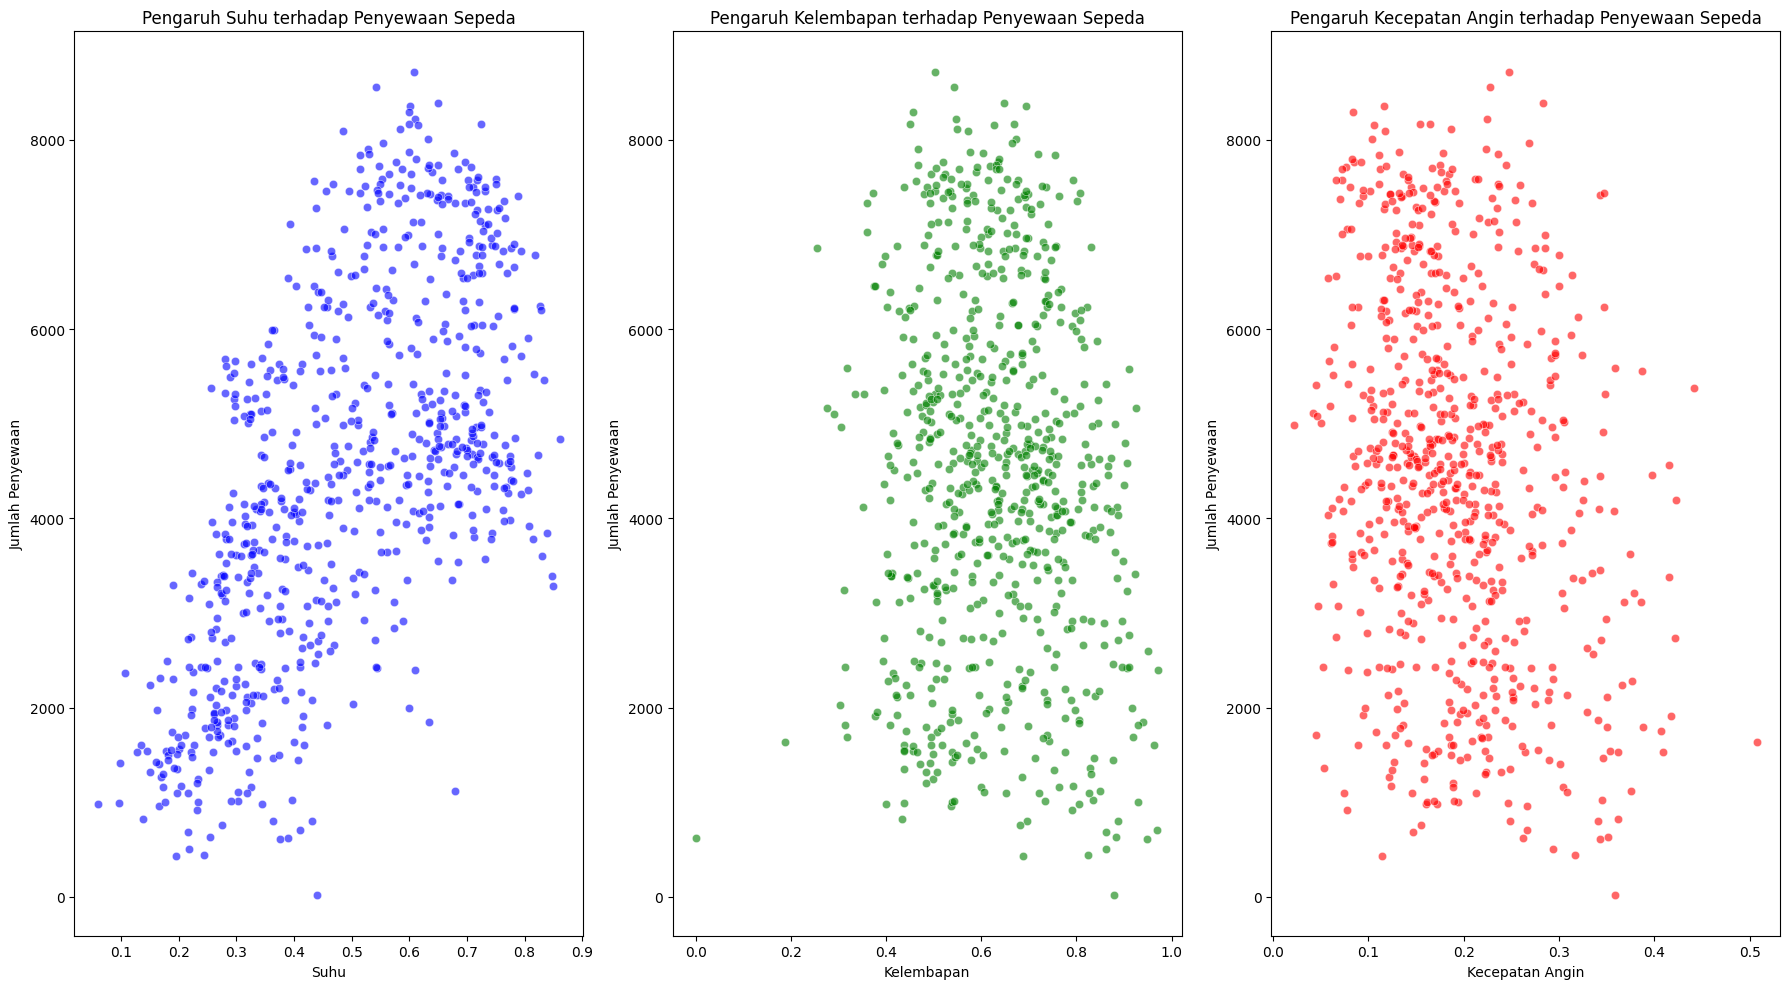

In [257]:
# Pengaruh Temperatur, Kelembaban, dan Kecepatan Angin
fig, axes = plt.subplots(1,3, figsize=(18, 10))

# Hubungan suhu terhadap penyewaan sepeda
sns.scatterplot(ax=axes[0], data=day_df, x="temp", y="cnt", color="blue", alpha=0.6)
axes[0].set_title("Pengaruh Suhu terhadap Penyewaan Sepeda")
axes[0].set_xlabel("Suhu")
axes[0].set_ylabel("Jumlah Penyewaan")

# Hubungan kelembapan terhadap penyewaan sepeda
sns.scatterplot(ax=axes[1], data=day_df, x="hum", y="cnt", color="green", alpha=0.6)
axes[1].set_title("Pengaruh Kelembapan terhadap Penyewaan Sepeda")
axes[1].set_xlabel("Kelembapan")
axes[1].set_ylabel("Jumlah Penyewaan")

# Hubungan kecepatan angin terhadap penyewaan sepeda
sns.scatterplot(ax=axes[2], data=day_df, x="windspeed", y="cnt", color="red", alpha=0.6)
axes[2].set_title("Pengaruh Kecepatan Angin terhadap Penyewaan Sepeda")
axes[2].set_xlabel("Kecepatan Angin")
axes[2].set_ylabel("Jumlah Penyewaan")

plt.tight_layout()
plt.show()

**Insight:**
- Visualisasi di atas menunjukkan korelasi faktor lingkungan terhadap penyewaan sepeda
- Suhu cukup berpengaruh positif dengan jumlah penyewaan sepeda. Semakin tinggi suhu, semakin banyak sepeda yang disewa.
- kelembaban tidak terlalu berpengaruh dengan jumlah penyewaan sepeda.
- kecepatan angin sedikit berpengaruh negatif terhadap jumlah penyewaan sepeda.

<ipython-input-258-0b25c07736aa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=day_df, x="weathersit", y="cnt", palette="coolwarm")
<ipython-input-258-0b25c07736aa>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Mendung", "Cerah", "Mendung", "Hujan Ringan", "Hujan Lebat"])


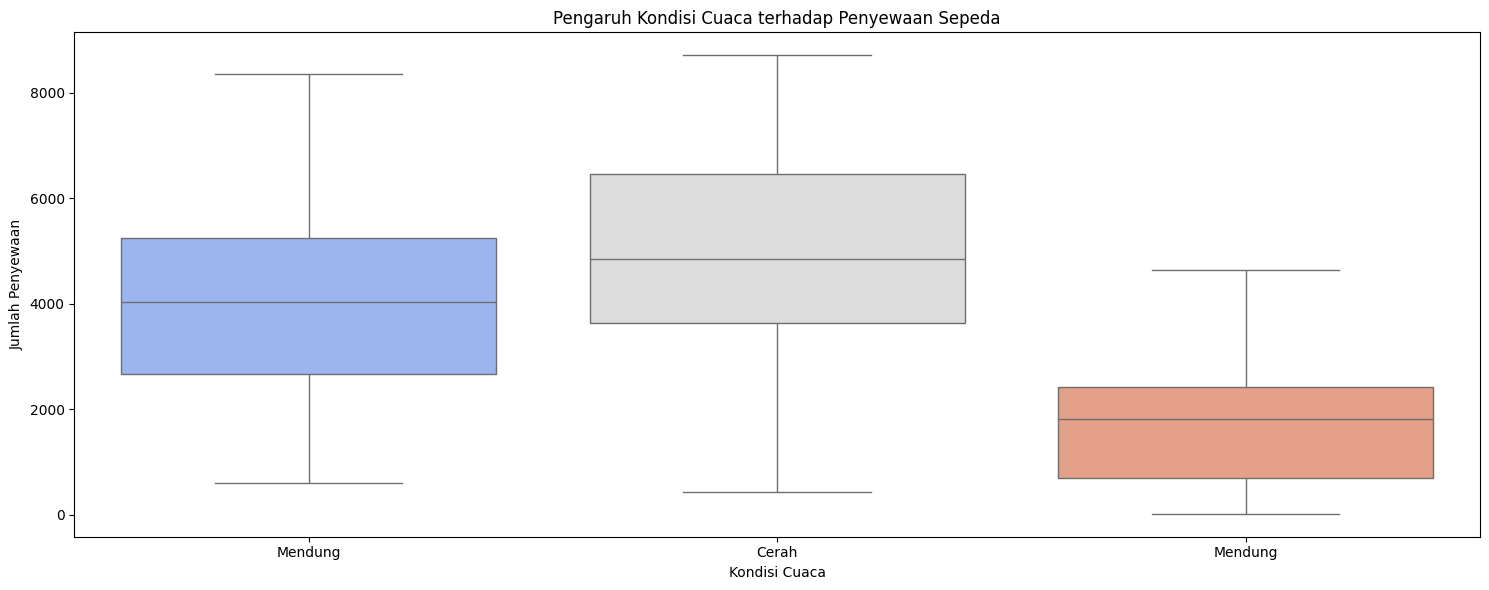

weathersit
Cerah              463
Berawan/mendung    247
Hujan ringan        21
Name: count, dtype: int64


In [258]:
# Pengaruh Cuaca terhadap Penyewaan Sepeda
fig, ax = plt.subplots(figsize=(15, 6))

sns.boxplot(ax=ax, data=day_df, x="weathersit", y="cnt", palette="coolwarm")
ax.set_title("Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda")
ax.set_xlabel("Kondisi Cuaca")
ax.set_ylabel("Jumlah Penyewaan")
ax.set_xticklabels(["Mendung", "Cerah", "Mendung", "Hujan Ringan", "Hujan Lebat"])

plt.tight_layout()
plt.show()
print(day_df["weathersit"].value_counts())

**Insight:**
- Visualisasi di atas menunjukkan hubungan faktor cuaca dengan penyewaan sepeda.
- Penyewaan sepeda tertinggi ada pada saat cuaca sedang cerah

### Pertanyaan 5: Bagaimana perbandingan jumlah penyewaan sepeda pada hari kerja dan hari libur?

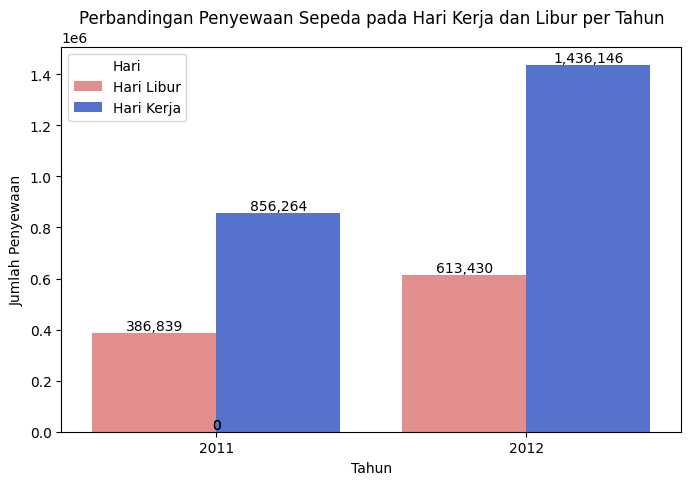

In [259]:
# Penyewaan sepeda berdasarkan hari kerja dan hari libur
yearly_workday = day_df.groupby(by=["yr", "workingday"]).agg({
    "cnt": "sum"
}).reset_index()

yearly_workday["yr"] = yearly_workday["yr"].map({0: "2011", 1: "2012"})
yearly_workday["workingday"] = yearly_workday["workingday"].map({0: "Hari Libur", 1: "Hari Kerja"})

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=yearly_workday, x="yr", y="cnt", hue="workingday", palette=["lightcoral", "royalblue"])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title("Perbandingan Penyewaan Sepeda pada Hari Kerja dan Libur per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Penyewaan")
plt.legend(title="Hari")
plt.show()


**Insight:**
- Visualisasi di atas menunjukkan hubungan hari kerja(working day) dan hari libur(holiday) terhadap penyewaan sepeda
- Penyewaan sepeda tertinggi ada pada saat hari kerja
- dari tahun 2011 ke 2012 menunjukkan peningkatan penyewaan sepeda

### Pertanyaan 6:  Bagaimana perbedaan pola penyewaan antara pengguna kasual (casual) dan pengguna terdaftar (registered) pada hari kerja dibandingkan akhir pekan?

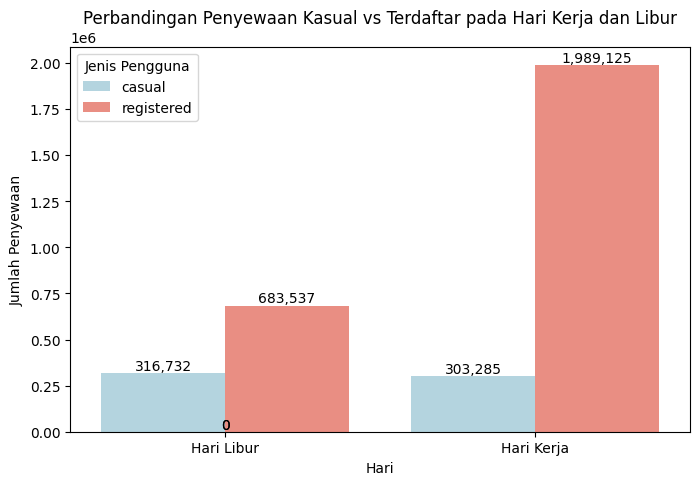

In [260]:
workday_summary = day_df.groupby(by= "workingday").agg({
    "casual": "sum",
    "registered":"sum"
}).reset_index()

workday_summary["workingday"] = workday_summary["workingday"].map({0: "Hari Libur", 1: "Hari Kerja"})
workday_summary = workday_summary.melt(id_vars="workingday", var_name="User Type", value_name="Count")

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=workday_summary, x="workingday", y="Count", hue="User Type", palette=["lightblue", "salmon"])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title("Perbandingan Penyewaan Kasual vs Terdaftar pada Hari Kerja dan Libur")
plt.xlabel("Hari")
plt.ylabel("Jumlah Penyewaan")
plt.legend(title="Jenis Pengguna")
plt.show()


**Insight:**
- Visualisasi di atas menunjukkan hubungan penyewaan sepeda pelanggan casual dan registered pada hari kerja(working day) dan hari libur(holiday) penyewaan sepeda.
- Penyewaan sepeda tertinggi ada pada pelanggan registered.
- Pelanggan casual mengalami penurunan pada hari kerja, sedangkan pelanggan registered mengalami peningkatan pada hari kerja (pelanggan casual lebih senang menyewa sepeda pada holiday, pelanggan registered lebih senang menyewa sepeda pada workingday),

## Analisis Lanjutan Clustering

In [261]:
def categorize_usage(cnt):
    if cnt > 4000:
        return "High Usage"
    elif cnt >= 2000:
        return "Medium Usage"
    else:
        return "Low Usage"

day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df["Usage Category"] = day_df["cnt"].apply(categorize_usage)
day_df = day_df.sort_values("dteday", ascending=False)

print(day_df[["dteday", "cnt", "Usage Category"]].head())

# Mencari tahu tanggal terakhir untuk setiap kategori penggunaan
last_high = day_df.loc[day_df["Usage Category"] == "High Usage", "dteday"].max()
last_medium = day_df.loc[day_df["Usage Category"] == "Medium Usage", "dteday"].max()
last_low = day_df.loc[day_df["Usage Category"] == "Low Usage", "dteday"].max()

print(f"Tanggal terakhir High Usage: {last_high}")
print(f"Tanggal terakhir Medium Usage: {last_medium}")
print(f"Tanggal terakhir Low Usage: {last_low}")

# Mencari tahu jumlah penyewaan untuk setiap kategori
num_high = (day_df["Usage Category"] == "High Usage").sum()
num_medium = (day_df["Usage Category"] == "Medium Usage").sum()
num_low = (day_df["Usage Category"] == "Low Usage").sum()

print(f"Jumlah High Usage: {num_high}")
print(f"Jumlah Medium Usage: {num_medium}")
print(f"Jumlah Low Usage: {num_low}")

        dteday   cnt Usage Category
730 2012-12-31  2729   Medium Usage
729 2012-12-30  1796      Low Usage
728 2012-12-29  1341      Low Usage
727 2012-12-28  3095   Medium Usage
726 2012-12-27  2114   Medium Usage
Tanggal terakhir High Usage: 2012-12-20 00:00:00
Tanggal terakhir Medium Usage: 2012-12-31 00:00:00
Tanggal terakhir Low Usage: 2012-12-30 00:00:00
Jumlah High Usage: 452
Jumlah Medium Usage: 181
Jumlah Low Usage: 98


**Insight:**
- Dengan clustering, dapat dikelompokkan penggunaan penyewaan sepeda menjadi high usage (cnt>4000), medium usage(cnt>=2000) dan low usage(cnt<2000).
- Dari pengelompokan tersebut dapat terlihat tanggal terakhir penyewaan masing-masing kategori tidak terlalu jauh jaraknya.
- Dari pengelompokan tersebut juga dapat dilihat bahwa jumlah high usage paling banyak diantara medium usage dan low usage. Artinya, penyewaan sepeda cukup diminati oleh masyarakat. Dari pengelompokan ini juga bisa diambil keputusan marketing yang cocok untuk setiap kategorinya.

## Conclusion

- **Bagaimana perubahan jumlah penyewaan sepeda dari tahun 2011 hingga 2012?**\\
Jumlah penyewaan sepeda menunjukkan tren peningkatan dari tahun 2011 ke 2012. Artinya penggunaan sepeda semakin populer dan banyak diminati di kalangan masyarakat.

- **Bagaimana pola penyewaan sepeda per bulan, dan apakah ada pola musiman yang memengaruhi jumlah penyewaan?** \\
Dalam 1 tahun, pola penyewaan sepeda dapat dilihat dari pola penyewaan per bulan dan per musim (keduanya saling berhubungan). Dilihat dari pola penyewaan per bulan, penyewaan sepeda setiap bulannya relatif bervariasi. Penyewaan sepeda tertinggi ada pada bulan Agustus dan penyewaan sepeda terendah ada pada bulan Januari. Hal ini berhubungan dengan pola penyewaan sepeda per musim. Pola penyewaan per musim tertinggi ada pada musim Fall (sekitar bulan Agustus) dan terendah pada musim Spring (sekitar bulan Januari).

- **Kapan jumlah penyewaan sepeda paling tinggi dalam sehari, baik berdasarkan jam maupun hari dalam seminggu?** \\
Pola penyewaan sepeda juga dapat dilihat berdasarkan hari dan jam. Masyarakat paling banyak menyewa sepeda di hari Jumat dan jarang menyewa sepeda di hari Minggu. Jam padat penyewa ada di pukul 8 pagi dan 17-18 pagi (diasumsikan jam berangkat dan pulang sekolah/bekerja). Sedangkan jam sepi penyewa ada di pukul 3-5 (subuh).

- **Bagaimana hubungan antara faktor lingkungan (kondisi cuaca (weathersit), suhu (temp), kelembapan (hum), dan kecepatan angin (windspeed)) terhadap jumlah penyewaan sepeda?** \\
Pola penyewaan sepeda juga dapat dilihat dari faktor lingkungan seperti kondisi cuaca (weathersit), suhu (temp), kelembapan (hum), dan kecepatan angin (windspeed). Suhu cukup berpengaruh positif dengan jumlah penyewaan sepeda. Semakin tinggi suhu, semakin banyak sepeda yang disewa. Kelembaban tidak terlalu berpengaruh dengan jumlah penyewaan sepeda. Kecepatan angin sedikit berpengaruh negatif terhadap jumlah penyewaan sepeda. Cuaca juga mempengaruhi penyewaan sepeda. Masyarakat paling sering menyewa sepeda pada saat cuaca cerah dan lumayan sering menyewa sepeda pada saat berawan. Namun ketika hujan ringan penyewaan sepeda sangat rendah.

- **Bagaimana perbandingan jumlah penyewaan sepeda pada hari kerja dan hari libur?** \\
Penyewaan sepeda banyak dilakukan ketika hari kerja dibandingkan hari libur. Masyarakat lebih sering melakukan penyewaan sepeda untuk mobilisasi ke tempat kerja/sekolah.

- **Bagaimana perbedaan pola penyewaan antara pengguna kasual (casual) dan pengguna terdaftar (registered) pada hari kerja dibandingkan akhir pekan?** \\
Pelanggan registered (terdaftar) lebih sering menyewa sepeda dibandingkan pelanggan casual. Hal tersebut juga berkaitan dengan pola pelanggan pada hari kerja dan hari libur. Pelanggan casual mengalami penurunan pada hari kerja, sedangkan pelanggan registered mengalami peningkatan pada hari kerja. Dapat dilihat bahwa pelanggan casual lebih senang menyewa sepeda pada holiday, pelanggan registered lebih senang menyewa sepeda pada workingday.